<a href="https://colab.research.google.com/github/uba/tathu/blob/master/notebooks/cpam-tathu-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

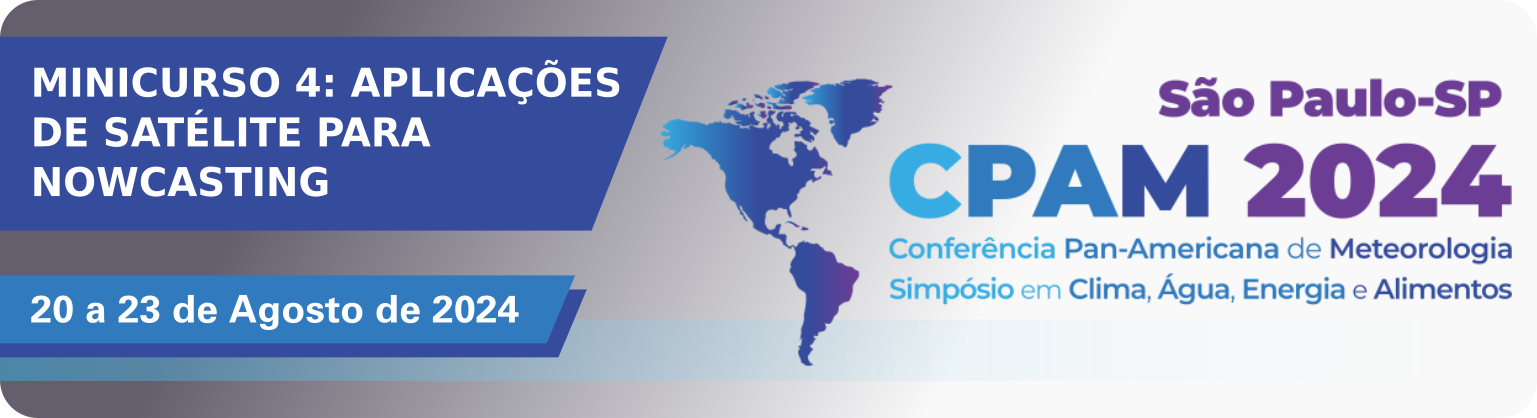

---
# Minicurso: **APLICAÇÕES DE SATÉLITE PARA NOWCASTING**
## Notebook Colab 2: **Introdução ao TATHU (Tracking and Analysis of Thunderstorms)**
---

**OBJETIVO:** Esta segunda parte prática do curso tem como objetivo ensinar a instalação e algumas funcionalidades da biblioteca TATHU: https://github.com/uba/tathu

---

**EMENTA**: Serão abordados os seguintes tópicos

1. Instalação e Teste do TATHU
2. Obtenção, Visualização e Remapeamento de Dados do Satélite GOES-16
3. Detecção, Caracterização e Rastreio dos Sistemas Convectivos
4. Armazenando os Resultados
5. Leitura e Exploração dos Resultados
6. Analisando o Sistema Convectivo Detectado com Dados do Sensor GLM
7. Testando uma Previsão
---

**DADOS:**
- A parte prática do curso utilizará como informações de entrada os dados do sensor Advanced Baseline Imager (ABI) e Geostationary Lightning Mapper (GLM) abordo do satélite Geostationary Operational Environmental Satellite - 16 (GOES-16). O período de dados é referente aos desastres naturais que ocorreram no estado do Rio Grande do Sul entre 26 de abril e 5 de maio de 2024. O INMET registrou para o mês de Maio um total de 617,1 mm, o que indicou uma chuva acima da média no valor de `480,5 mm`. Em adição, a estação pluviômétrica do CEMADEN localizada em Santa Maria (RS) registrou `236 mm` no dia 30 de abril. Os desastres afetaram 2.390.556 pessoas e provocaram a morte de 172 pessoas. Abaixo, dados da estação pluviométrica do CEMADEN para o minicípio de Santa Maria no dia 30/04/2024:

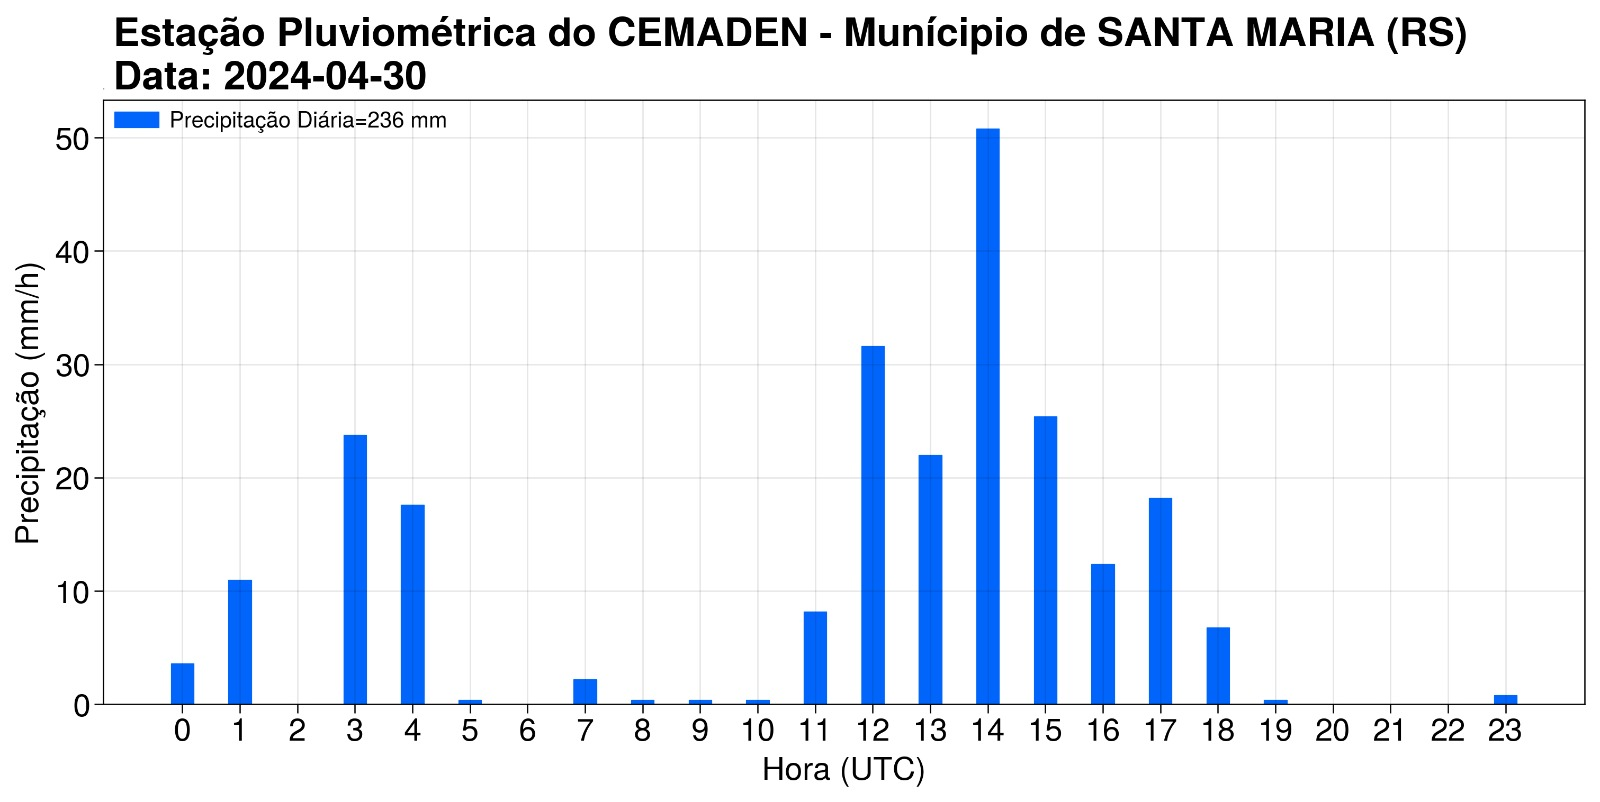
- Maiores detalhes sobre o evento pode ser encontrado na Nota Técnica emitida pelo [INMET-Eventos Extremos de Março de 2024 no Brasil](https://github.com/evmpython/minicurso_nowcasting_CPAM2024/blob/main/docs/EventosExtremos-Brasil-Maio-2024.pdf) e [CEMADEN - Boletim de Impactos de Extremos de Origem Hidro-Geo-Climático em Atividades Estratégicas para o Brasil – 14/05/2024 ANO 07 Nº 66](https://www.gov.br/cemaden/pt-br/assuntos/monitoramento/boletim-de-impactos/copy4_of_boletim-de-impactos-de-extremos-de-origem-hidro-geo-climatico-em-atividades-estrategicas-para-o-brasil-2013-17-01-2024-ano-07-no-62).


---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos serão realizados nesse código:
1. **1° Passo:** Instalação e Teste do TATHU
2. **2° Passo:** Obtenção, Visualização e Remapeamento de Dados do Satélite GOES-16

  2.1 Download de Imagens GOES-16

  2.2 Verificando a Lista de Arquivos Obtidos
  
  2.3 Visualizando o Setor Full-Disk
  
  2.4 Remapeamento para Grade Regular

3. **3° Passo:** Detecção, Caracterização e Rastreio dos Sistemas Convectivos  

  3.1 Detecção Utilizando Limiarização

  3.2 Extração de Atributos

  3.3 Função para Detecção e Extração de Atributos

  3.4 Rastreio Utilizando Sobreposição de Áreas

4. **4° Passo:** Armazenando os Resultados

  4.1 SpatiaLite

5. **5° Passo:** Leitura e Exploração dos Resultados

  5.1 Conectando no SpatiaLite

  5.2 Visualizando os Sistemas Convectivos Armazenados em Banco

  5.3 Seleção por Maior Tempo de Duração

  5.4 Visualizando Espacialmente a Evolução de um Sistema Convectivo

  5.5 Acessando a Representação Geométrica de Cada Instante de Tempo do Sistema Convectivo

  5.6 Função para Visualização de Geometrias

6. **6° Passo:** Analisando o Sistema Convectivo Detectado com Dados do Sensor GLM

  6.1 Visualizando os Dados de Descargas Elétricas

  6.2 Extraindo Atributos de Descargas Elétricas por Sistema Convectivo

  6.3 Diversas Formas de Visualizar os Atributos dos Sistemas Convectivos

7. **7° Passo:** Testando uma Previsão
---

**OBSERVAÇÕES IMPORTANTES**:
1. Este código foi desenvolvido para ser processado no [Google Colaboratory](https://colab.research.google.com/).
2. Os dados e códigos do curso também estão disponíveis no [github do curso](https://github.com/evmpython/minicurso_nowcasting_CPAM2024).

---

**EQUIPE:**

Palestrantes/Tutores:
 - Diego Souza - INPE: diego.souza@inpe.br / https://github.com/diegormsouza
 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Rachel Albrecht - USP: rachel.albrecht@iag.usp.br
 - Thiago Souza Biscaro - INPE: thiago.biscaro@inpe.br / https://github.com/tsbiscaro
 - Vito Galligani - CONICET/UBA/Argentina: vito.galligani@gmail.com

Colaboradores:
 - Camila Lopes - camila.lopes@iag.usp.br / https://github.com/cclopes
 - Douglas Uba - INPE: douglas.uba@inpe.br / https://github.com/uba
 - Flávio Augusto - UNIFEI: augustoflaviobob@gmail.com
 - Paola Salio - UBA/Argentina: salio@cima.fcen.uba.ar
---

# **1° Passo:** Instalação e Teste do TATHU (Tracking and Analysis of Thunderstorms)

![https://github.com/uba/tathu](https://raw.githubusercontent.com/uba/tathu/master/docs/sphinx/img/logo-tathu.png)

Para utilizar o pacote TATHU, é necessário instalar as dependências necessárias além do próprio TATHU. No ambiente do Google Colab, uma forma mais prática de instalar pacotes é a partir do gerenciador de pacotes `condacolab`, que será instalado no comando abaixo.

> *este comando reinicia o ambiente colab automaticamente após concluído*

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

Os comandos abaixo instalam as dependências necessárias

> *este comando pode levar um tempo para ser concluído (~2 min)*

In [ ]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict
!mamba install -c conda-forge aenum cartopy geopandas netcdf4 opencv pathos psycopg2 pyproj proj=9.2.0 rasterstats requests rtree s3fs scikit-image scipy tqdm pyyaml

Enfim, o pacote TATHU é instalado com os comandos abaixo.

In [ ]:
!git clone https://github.com/uba/tathu.git
%cd tathu/
!python -m pip install --no-deps -e .

Com o pacote instalado, basta importá-lo para o ambiente de execução.

In [ ]:
import tathu
print('Version', tathu.__version__)

from tathu.logo import TATHU_BANNER
print(TATHU_BANNER)

# **2° Passo:** Obtenção, Visualização e Remapeamento de Dados do Satélite GOES-16

### **Download de Imagens GOES-16**

Utilizando o suporte fornecido pelo TATHU, vamos realizar o download de um conjunto de dados do satélite GOES-16. Mais especificamente, utilizaremos o canal 13 (10,35 µm) do setor *full-disk* (disco hemisférico completo) do sensor ABI (*Advanced Baseline Imager*, Imageador Avançado de Base) entre 12 e 15 UTC do dia 30 de Abril de 2024. Essas imagens serão utilizadas para a detecção e rastreio dos objetos de interesse, os **Sistemas Convectivos (SC)**.

In [ ]:
# Import the libraries
from datetime import datetime
from tathu.downloader.goes import AWS
from tathu.progress import TqdmProgress

# Download 30 April 2024, Channel 13 for 12, 13, 14 and 15 hours UTC
start = end = datetime.strptime('20240430', '%Y%m%d')
hours = ['12', '13', '14', '15']

# From AWS (full-disk)
AWS.download(AWS.buckets['GOES-16'],
             ['ABI-L2-CMIPF'],
             start,
             end,
             hours,
             ['13'],
             './goes16-aws',
             progress=TqdmProgress('Download GOES-16 data (AWS)', 'files'))

### **Verificando a Lista de Arquivos Obtidos**

Com os dados baixados, vamos realizar uma busca no sistema de arquivos para definir uma lista de dados (arquivos do tipo NetCDF) que serão utilizados nos processos de detecção e rastreio.

In [ ]:
# Import the library
import glob

# List download files
files = sorted(glob.glob("./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/*/*/*.nc"))
for f in files:
  print(f)

### **Visualizando o Setor Full-Disk**

Para exemplificar o tipo de dado que estamos trabalhando, vamos visualizar a imagem do dia 30 de Abril de 2024 às 00:00 UTC. Tratam-se de imagens no infravermelho termal, posicionado em uma região de janela atmosférica (em 10,35 µm). O setor *full-disk* refere-se ao imageamento de um Polo a outro da Terra, dentro dos limites de longitude estabelecidos pela posição do satélite geoestacionário.

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# Visualize first file
path = files[0]

# Open netCDF file and show full-disk data
nc = Dataset(path)
data = nc.variables['CMI'][:]
plt.imshow(data, cmap='Greys', vmin=180.0, vmax=320.0)
plt.colorbar()
nc.close()

### **Remapeamento para Grade Regular**

Para o processo de detecção e rastreio, precisamos remapear o dado  *full-disk* para uma grade regular. Essa operação pode ser realizada a partir do suporte fornecido pelo TATHU. Precisamos fornecer a região geográfica desejada (`extent`) e a resolução espacial que iremos trabalhar (em quilômetros) (`resolution`). Aqui, faremos o remapeamento dos dados para a região geográfica que destaca a **região Sul do Brasil**, na resolução de 2 km.

Nota: o parâmetro `extent` é uma lista de 4 valores que indicam  as coordenadas dos cantos inferior esquerdo (`ll - lower left`) e superior direito (`ur - upper right`) da região geográfica. A ordem correta dos valores `extent` é:

```
extent = [llx, lly, urx, ury]
```

Onde:
-  `llx`: longitude mínima
-  `lly`: latitude mínima
-  `urx`: longitude máxima
-  `ury`: latitude máxima

In [ ]:
# Import the libraries
from osgeo import gdal
from tathu.constants import LAT_LON_WGS84
from tathu.satellite import goes_r

# Geographic area of regular grid [llx, lly, urx, ury], where ll=lower-left, ur=upper-right
extent = [-60.00, -38.00, -45.00, -22.00]

 # Grid resolution (kilometers)
resolution = 2.0

print('Remapping')
grid = goes_r.sat2grid(path, extent, resolution, LAT_LON_WGS84, 'HDF5', progress=gdal.TermProgress_nocb)

# Visualize regular grid result
from tathu.visualizer import MapView

m = MapView(extent, references=['https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/BR_UF_2019.shp'])
m.plotImage(grid, cmap='Greys', vmin=180.0, vmax=320.0)
m.show()

# **3° Passo:** Detecção, Caracterização e Rastreio dos Sistemas Convectivos

### **Detecção Utilizando Limiarização**

Vamos agora realizar a **detecção** dos SCs utilizando um processo de limiarização, implementado na classe `detector.LessThan`.

Para isso, é necessário definir alguns parâmetros de configuração:

* `threshold` - Valor máximo de temperatura de brilho (210K).
* `minarea` - Área mínima de detecção (3000 km$^2$) para cada SC.

In [ ]:
# import the library
from tathu.tracking.utils import area2degrees

# Threshold value
threshold = 210 # Kelvin. Equivalante a -63.15 graus Celsius

# Define minimum area
minarea = 3000 # km^2

# Convert to degrees^2
minarea = area2degrees(minarea)

Realizamos o processo de deteção a partir da classe `detector.LessThan`:

In [ ]:
# import the library
from tathu.tracking import detectors

# Create detector
detector = detectors.LessThan(threshold, minarea)

# Searching for systems
print('Searching for systems...')
systems = detector.detect(grid)
print('# Number of detected systems:', len(systems))

Os limites geográficos de cada SC detectado (em vermelho) podem ser visualizados a partir do seguinte trecho de código:


In [ ]:
m = MapView(extent, references=['https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/BR_UF_2019.shp'])
m.plotImage(grid, cmap='Greys', vmin=180.0, vmax=320.0)
m.plotSystems(systems, facecolor='none', edgecolor='red', centroids=True)
m.show()

### **Extração de Atributos**

Uma vez definidos os limites geográficos de cada SC, podemos extrair uma série de atributos para cada objeto de interesse.

Neste caso, pode-se considerar atributos espectrais (medidas de
um sensor em diferentes canais), análises estatísticas (média, variância,
etc) e de forma (tamanho, orientação, retangularidade), entre outros.

Neste exemplo, vamos extrair atributos estatísticos para cada SC, incluindo valor mínimo, médio e desvio padrão de temperatura de brilho, além do número de pixels que compõe determinado sistema - `attrs = ['min', 'mean', 'std', 'count']`.

Essa operação é realizada pela classe `descriptors.StatisticalDescriptor`.



In [ ]:
# import the library
from tathu.tracking import detectors

# Create detector
detector = detectors.LessThan(threshold, minarea)

# Searching for systems
print('Searching for systems...')
systems = detector.detect(grid)
print('# Number of detected systems:', len(systems))

# Attributes that will be computed
attrs = ['min', 'mean', 'std', 'count', 'nae']

# Silence some warnings in order to improve visualization
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings('ignore', category=ShapelyDeprecationWarning)
from tathu.tracking import descriptors

# Create statistical descriptor
descriptor = descriptors.StatisticalDescriptor(rasterOut=True)

# Describe systems (stats)
descriptor.describe(grid, systems)

for s in systems:
  s.attrs['nae'] = 0

# Visualize attributes
for s in systems:
  print(s.name, s.attrs)

### **Função para Detecção e Extração de Atributos**

Compreendidos os conceitos de remapeamento, deteção e extração de atributos (i.e. caracterização), vamos agora definir uma função auxiliar em Python para realizar essas operações dado um caminho de arquivo - `path`.

Chamaremos a função de `detect`, definida a seguir. A função retorna ao final uma lista de objetos que representam cada SC.



In [ ]:
from tathu.utils import file2timestamp

def detect(path, grids=None):

  # Extract time from file-name
  timestamp = file2timestamp(path, regex=goes_r.DATE_REGEX, format=goes_r.DATE_FORMAT).replace(microsecond=0)

  print('Processing', timestamp)

  # Remap data
  grid = goes_r.sat2grid(path, extent, resolution, LAT_LON_WGS84, 'HDF5', progress=gdal.TermProgress_nocb)

  # Create detector
  detector = detectors.LessThan(threshold, minarea)

  # Searching for systems
  print('Searching for systems...')
  systems = detector.detect(grid)
  print('# Number of detected systems:', len(systems))

  # Adjust timestamp for each system
  for s in systems:
    s.timestamp = timestamp

  # Create statistical descriptor
  descriptor = descriptors.StatisticalDescriptor(rasterOut=True)

  # Describe systems (stats)
  descriptor.describe(grid, systems)

  for s in systems:
    s.attrs['nae'] = 0

  if grids is not None:
    # Store remapped image
    grids.append(grid)
  else:
    # Free resources
    grid = None

  return systems

Agora podemos utilizar essa função de modo prático para cada arquivo de imagem.

Por exemplo, para a primeira imagem da lista temos:

In [ ]:
systems = detect(files[0])

## **Rastreio Utilizando Sobreposição de Áreas**

Definida a função `detect` capaz de detectar e extrair os atributos dos SC para cada instante de tempo, vamos agora tratar da **associação** desses elementos no tempo (i.e. **acompanhamento**, **rastreio automático**).

A etapa de rastreio serve para determinar como os objetos de interesse se comportaram no intervalo de tempo ∆t decorrido
entre duas imagens. Nessa etapa, os processos de detecção e caracterização também são utilizados. Em síntese, o rastreio deve ser capaz de determinar quais objetos da observação anterior ainda estão presentes no instante t (associação) e também identificar novos objetos que surgiram.

Como exemplo, o rastreio pode ser realizado a partir da relação topológica entre os SC em conjunto com a análise das áreas de interseção.

![https://tathu.readthedocs.io/en/latest/split.merge.html](https://raw.githubusercontent.com/uba/tathu/master/docs/sphinx/img/system-events.png)

A figura acima mostra situações consideradas durante o rastreio dos SC a partir do critério de interseção de área mínima: (a) continuidade, (b) separação (*split*) e (c) fusão (*merge*). As linhas tracejadas representam os sistemas no instante t−∆t.


Vamos utilizar a classe `tracker.OverlapAreaTracker` do TATHU para realizar o rastreio considerando imagens de dois instantes de tempo distintos e consecutivos: 00:00 UTC e 00:10 UTC. Uma sobreposição de pelo menos 10% da área é necessária para definir que os SCs são o mesmo elemento se propagando no tempo.


In [ ]:
# Import the function
from tathu.tracking import trackers

# Define overlap area criterion
overlapAreaCriterion = 0.1 # 10%

systems_00_00_UTC = detect(files[0]) # previous
systems_00_10_UTC = detect(files[1]) # current

# Create overlap area strategy
strategy = trackers.RelativeOverlapAreaStrategy(overlapAreaCriterion)

#  Let's track!
print('Tracking...')
t = trackers.OverlapAreaTracker(systems_00_00_UTC, strategy=strategy)
t.track(systems_00_10_UTC)
print('done!')

# Let's see the defined relations for each current system
for system in systems_00_10_UTC:
  print(system.event, len(systems_00_10_UTC))

# Add plot to show this initial tracking?
m = MapView(extent, references=['https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/BR_UF_2019.shp'])
m.plotImage(grid, cmap='Greys', vmin=180.0, vmax=320.0)
m.plotSystems(systems_00_00_UTC, facecolor='none', edgecolor='red', centroids=True)
m.plotSystems(systems_00_10_UTC, facecolor='none', edgecolor='green', centroids=True)
m.show() # add more references

De modo mais generalizado, podemos realizar o rastreio considerando todo o conjunto de imagens:


In [ ]:
# Import the function
from tathu.tracking import trackers

# List that store detected systems
systems = []

# List that store remapped images
grids = []

# Prepare tracking...
previous = None

# Define overlap area criterion
overlapAreaCriterion = 0.1 # 10%

# Create overlap area strategy
strategy = trackers.RelativeOverlapAreaStrategy(overlapAreaCriterion)

# for each image file
for f in files:

  # Detect current systems
  current = detect(f, grids)

  # Store
  systems.append(current)

  if previous is None:
    previous = current
    continue

  # Let's track!
  print('Tracking...')
  t = trackers.OverlapAreaTracker(previous, strategy=strategy)
  t.track(current)
  print('done!')

  # Compute normalized area expansion attribute
  descriptor = descriptors.NormalizedAreaExpansionDescriptor()
  descriptor.describe(previous, current)

  # Prepare next iteration
  previous = current

Feito isso, a lista `systems` é populada com todos os sistemas convectivos rastreados.

In [ ]:
print(systems)

Verificando cada sistema e seus atributos, com destaque para o identificador único (`name`), os atributos escalares (`attrs`) e a geometria espacial (`geom`):

In [ ]:
for t in systems:  # for each time (t)
  for system in t: # for each system in t
    print(system.name, system.attrs, system.geom) # show features

# **4° Passo:** Armazenando os Resultados

Neste ponto, uma lista de objetos de interesse (SCs) está definida, mas temos ela somente em memória. Veremos agora como armazenar (*i.e.* serializar) esse resultado em um **Banco de Dados com Suporte Espacial**, o SpatiaLite, com ajuda do TATHU.

Para cada SC detectado, em cada instante de tempo, as colunas salvas no banco de dados são:

- `name`: identificador do sistema
- `timestamp`: data do sistema
- `event`: classificação do sistema, podendo ser
  - `SPONTANEOUS_GENERATION`: geração espontânea
  - `CONTINUITY`: continuidade
  - `MERGE`: fusão
  - `SPLIT`: separação
- `min`: temperatura de brilho (Tb) mínima do sistema (K)
- `mean`: Tb média do sistema (K)
- `count`: tamanho (em pixels) do sistema
- `nae`: expansão da área normalizada do sistema
- `std`: desvio-padrão de Tb do sistema
- `relationships`: relação entre famílias quando há fusão/separação
- `geometry`: limites geográficos do sistema

### **SpatiaLite**

‎| ‎
-------------------|------------------
![https://www.gaia-gis.it/fossil/libspatialite/index](https://www.gaia-gis.it/fossil/libspatialite/logo)      | ![www.sqlite.org](https://www.sqlite.org/images/sqlite370_banner.gif)

[SpatiaLite](https://www.gaia-gis.it/fossil/libspatialite/index) é uma biblioteca de código aberta com o objetivo de estender o **banco de dados** [SQLite](https://www.sqlite.org/index.html) para oferecer **suporte espacial**. Esses bancos de dados com suporte espacial possuem a capacidade de armazenar **atributos tabulares** em conjunto com a **representação espacial** dos objetos, permitindo a construção de diferentes funcionalidades e modos de consulta. A partir do armazenamento dos resultados nesse tipo de estrutura, consegue-se realizar consultas espaço-temporais de modo bastante eficiente.

Usaremos o módulo `tathu.io.spatialite` para exportarmos os resultados. O banco de dados será armazenado em um arquivo em disco chamado `systems-db.sqlite`.

In [ ]:
import os
from tathu.io import spatialite

db_path = '/content/systems-db.sqlite'
if os.path.isfile(db_path):
  os.remove(db_path)

# Create database connection
db = spatialite.Outputter(db_path, 'systems', attrs)

# for each list of systems, output to SpatiaLite Database
for item in systems:
  db.output(item)

# **5° Passo:** Leitura e Exploração dos Resultados

Neste ponto, temos salvo no Banco de Dados (arquivo `systems-db.sqlite`) os resultados obtidos no rastreio dos sistemas convectivos. Esta seção apresenta exemplos de como podemos ler e explorar os dados utilizando o suporte SQL e as operações espaciais.  

### **Conectando no SpatiaLite**

Agora, vamos realizar a conexão com o banco de dados  `SpatiaLite` gerado anteriormente (`/content/systems-db.sqlite`).

A vantagem é que esse formato de base de dados tem uma linguagem própria ([SQL](https://pt.wikipedia.org/wiki/SQL)) que permite buscas e relações mais eficientes (principalmente em bases muito grandes) do que outras linguagens de programação.

In [ ]:
from tathu.io import spatialite

# Database location
dbname = '/content/systems-db.sqlite'
table = 'systems'

# Connect to database using TATHU support
tathu_db = spatialite.Loader(dbname, table)

Estabelecida a conexão com a base de dados, podemos realizar a leitura dos dados a partir do suporte oferecido pelo TATHU com os métodos da classe `spatialite.Loader`. Por exemplo, para ler os nomes das famílias de sistemas:

In [ ]:
names = tathu_db.loadNames()
print(names)

### **Visualizando os SCs Armazenados em Banco**

O módulo `tathu.visualizer` possui diversas formas de visualização dos SCs. Para uma visualização rápida dos limites geográficos juntamente com a classificação dos SCs armazenados no banco de dados, basta usar a função `AnimationMapDatabase()`:

In [ ]:
from tathu import visualizer
from matplotlib import rc
rc('animation', html='jshtml')

# Animation
animation = visualizer.AnimationMapDatabase(tathu_db, extent, grids, tathu_db.getDates())
plt.close()
animation

### **Seleção por Maior Tempo de Duração**

Vamos descobrir a família de SCs que teve o maior tempo de duração utilizando o suporte SQL fornecido pelo SpatiaLite:

In [ ]:
rows = tathu_db.query('SELECT name, COUNT(name) as occurrences from systems GROUP BY name ORDER BY occurrences DESC')
for row in rows:
  print(row[0], row[1])

In [ ]:
name = rows[0][0]
print('Sistema com maior tempo de duração:', name)

Conhecido esse nome, podemos carregar a  história de uma família específica a partir do método `load`. Vamos obter os atributos `['min', 'mean', 'std', 'count', 'nae']` desta família:

In [ ]:
fam = tathu_db.load(name, ['min', 'mean', 'std', 'count', 'nae'])

### **Visualizando Espacialmente a Evolução de um SC**

Voltando ao módulo `tathu.visualizer`, vamos visualizar a história do sistema convectivo com maior tempo de duração a partir da classe `visualizer.SystemHistoryView`:

In [ ]:
from tathu import visualizer

# Only system
view = visualizer.SystemHistoryView(fam)
view.show()

In [ ]:
# System + Images
view = visualizer.SystemHistoryView(fam, grids, extent)
view.show()

Podemos também visualizar, a partir de uma animação, a evolução da temperatura de brilho mínima e tamanho (em pixels) com a classe `visualizer.AnimationMap()`:

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

animation = visualizer.AnimationMap(fam, ['min', 'count'])
plt.close()
animation

Além das visualizações disponíveis no TATHU, é possível utilizar os dados extraídos para desenvolver outras formas de visualização a partir das informações extraídas. Por exemplo, o código abaixo gera a evolução temporal da Temperatura de Brilho mínima (`min`) e Área (`count`) da família selecionada (`fam`):

In [ ]:
import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

time_labels = []
for t in fam.getTimestamps():
  time_labels.append(t.strftime('%H:%M'))

# Plotting the 'min' column on the primary y-axis (ax1)
ax1.plot(fam.getTimestamps(), fam.getAttribute('min'), '-o', label='Brightness Temperature (min.)', color='blue')
ax1.set_xlabel('Time (UTC)')
ax1.set_xticks(fam.getTimestamps())
ax1.set_xticklabels(time_labels, rotation=45)
ax1.set_ylabel('Brightness Temperature (K)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis (ax2) for the 'count' column
ax2 = ax1.twinx()
ax2.plot(fam.getTimestamps(),fam.getAttribute('count'), '--o', label='Size (pixels)', color='green')
ax2.set_ylabel('Size (pixels)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding labels and title
plt.title('Temporal Evolution of Brightness Temperature and Size')

# Displaying the legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

### **Acesssando a Representação Geométrica de Cada Instante de Tempo do SC**

A representação geométrica dos SCs é armazenada na forma de polígonos (`POLYGON`), que podem ser acessados da seguinte forma:

In [ ]:
for system in fam.systems:
  print(system.timestamp, '->', system.geom)

### **Função para Visualização de Geometrias**
Vamos definir uma função `plot_geoms` para visualização das geometrias:

In [ ]:
import matplotlib.pyplot as plt

def plot_geoms(geoms, coords=None):
    fig = plt.figure()
    for g in geoms:
        y = []; x = []
        points = g.GetGeometryRef(0).GetPoints()
        for p in points:
            y.append(p[0]); x.append(p[1])
        plt.plot(x, y)
    if coords:
      for p in coords:
        plt.plot(p.GetY(), p.GetX(), 'ro')

Visualizando a geometria do primeiro instante de tempo que o SC foi detectado:

In [ ]:
plot_geoms([fam.systems[0].geom])

Visualizando todas as geometrias do SC:

In [ ]:
plot_geoms(fam.getPolygons())

Verificando se uma determinada coordenada está contida nos limites do SC, em um instante de tempo:

In [ ]:
from osgeo import ogr

# Contains case
coordinate = ogr.Geometry(ogr.wkbPoint)
coordinate.AddPoint(-53.0, -30.20)

system = fam.systems[0]

if system.geom.Contains(coordinate):
  print('Contains!')
else:
  print('Does not contain...')

plot_geoms([fam.systems[0].geom], [coordinate])

# Not Contains case
coordinate = ogr.Geometry(ogr.wkbPoint)
coordinate.AddPoint(-53.5, -30.20)

if system.geom.Contains(coordinate):
  print('Contains!')
else:
  print('Does not contain...')

plot_geoms([fam.systems[0].geom], [coordinate])


# **6° Passo:** Analisando o SC Detectado com Dados do Sensor GLM

Utilizando o suporte fornecido pelo TATHU, vamos realizar o download de um conjunto de dados medidos pelo sensor GLM do GOES-16. Usaremos novamente como referência o dia 30 de Abril de 2024. O objetivo é avaliarmos os dados de descargas elétricas em conjunto com os SCs detectados anteriormente.

In [ ]:
from datetime import datetime
from tathu.downloader.goes import AWS
from tathu.progress import TqdmProgress

# Download 30 April 2024, [12, 13, 14, 15] hours UTC
start = end = datetime.strptime('20240430', '%Y%m%d')
hours = ['12', '13', '14', '15']

# From AWS (GLM)
AWS.download(AWS.buckets['GOES-16'],
             ['GLM-L2-LCFA'],
             start,
             end,
             hours,
             ['12', '13', '14', '15'],
             './goes16-aws',
             progress=TqdmProgress('Download GOES-16 GLM data (AWS)', 'files'))

Os dados foram baixados. Vamos realizar uma busca no sistema de arquivos para definir uma lista de arquivos do GLM que serão utilizados na análise.

In [ ]:
import glob

# List download files
files = sorted(glob.glob("./goes16-aws/noaa-goes16/GLM-L2-LCFA/2024/*/**/*.nc"))
for f in files:
  print(f)

print('Number of files #', len(files))

Os dados do GLM possuem uma altíssima frequência temporal (i.e. dados a cada 20 segundos). É possível observar isso pela quantidade de arquivos obtidos via download - 720 arquivos no período entre 12:00 e 15:50 UTC.


Para esta análise, vamos processar esses dados visando reduzir o volume de arquivos e condensar as informações, ajustando a resolução temporal para 10 minutos, a mesma dos dados GOES-16/ABI, ou seja, dos SCs detectados.

Para isso, vamos utilizar o suporte fornecido pelo TATHU para acumular as observações em janelas de 10 minutos. Esse processamento pode ser realizado utilizando o código abaixo:



In [ ]:
from tathu.satellite import glm

# Compute densties for each 10 minute interval
density = glm.LightningDensity(files, extent, resolution=8.0)
glm_accumulated_data = density.build(interval=10) # minutes

## **Visualizando os Dados de Descargas Elétricas**

Vamos definir a função `plot_accumulated_glm()` para visualizar os dados de densidade de descargas elétricas dentro dos limites geográficos dos SCs armazenados.

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

from matplotlib import rc
rc('animation', html='jshtml')

# Setup style
style = {
  'geom_facecolor': 'red',
  'geom_edgecolor': 'red',
  'geom_alpha': 0.3
}

# Adjust extents for Cartopy format
system_extent = fam.getExtent()
view_extent = [system_extent[0], system_extent[2], system_extent[1], system_extent[3]]
data_extent = [extent[0], extent[2], extent[1], extent[3]]

# Create plot for first timestamp
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
plt.close()
ax.set_extent(view_extent, crs=ccrs.PlateCarree())
ax.coastlines(linewidth=0.4, linestyle='solid', color='lightgray')
ax.add_feature(cfeature.BORDERS, linewidth=0.4, linestyle='solid', color='lightgray')

# Plot system geometry (first)
geom = fam.systems[0].geom
lats, lons = [], []
points = geom.GetGeometryRef(0).GetPoints()
for p in points:
    lons.append(p[0]); lats.append(p[1])
xy = list(zip(lons, lats))
poly = Polygon(xy, facecolor=style['geom_facecolor'],
  lw=1.0, edgecolor=style['geom_edgecolor'], alpha=style['geom_alpha']
)
ax.add_patch(poly)

# Plot GLM (first)
data = glm_accumulated_data[0]
im = ax.imshow(np.ma.masked_where(data.array == 0, data.array),
  transform=ccrs.PlateCarree(), extent=data_extent, vmax=20, zorder=100)

cbar = fig.colorbar(im, ax=ax, orientation='horizontal', ticks=[0, 5, 10, 15, 20])
cbar.set_label('Flashes (fl/10min)')

def updatefig(i):
    data = glm_accumulated_data[i]
    # Update tile
    ax.set_title('Timestamp: {}'.format(data.timestamp))
    # Remove old geometries
    [p.remove() for p in reversed(ax.patches)]
    # Update Polygon
    geom = fam.systems[i].geom
    lats, lons = [], []
    points = geom.GetGeometryRef(0).GetPoints()
    for p in points:
        lons.append(p[0]); lats.append(p[1])
    xy = list(zip(lons, lats))
    poly = Polygon(xy, facecolor=style['geom_facecolor'],
      lw=1.0, edgecolor=style['geom_edgecolor'], alpha=style['geom_alpha'],
    )
    ax.add_patch(poly)
    # Update GLM
    im.set_array(np.ma.masked_where(data.array == 0, data.array))
    return im,

anim = animation.FuncAnimation(fig, updatefig,
  frames=len(glm_accumulated_data), blit=True, repeat=True, interval=600)
anim

## **Extraindo Atributos de Descargas Elétricas por SC**

Usaremos a mesma classe `descriptors.StatisticalDescriptor`, dessa vez aplicada aos dados de descargas elétricas, para extrair os atributos `['max', 'mean', 'sum]` dos SCs associados à densidade máxima, média e total de raios, respectivamente.

In [ ]:
from tathu.utils import array2raster

# Load family from database
fam = tathu_db.load(name, ['min', 'mean', 'std', 'count', 'nae'])

# Create statistical descriptor
descriptor = descriptors.StatisticalDescriptor(stats=['max', 'mean', 'sum'], rasterOut=True, prefix='glm_')

# Computing zonal stats
for i in range(len(glm_accumulated_data)):
  # Generate grid-object from glm
  grid = array2raster(glm_accumulated_data[i].array, extent, nodata=0)
  # Describe GLM for current system (stats)
  descriptor.describe(grid, [fam.systems[i]])

# Adjust last SC timestamp
fam.systems[-1].attrs['glm_max'] = None
fam.systems[-1].attrs['glm_mean'] = None
fam.systems[-1].attrs['glm_sum'] = None

## **Diversas Formas de Visualizar os Atributos dos SCs**

Os códigos abaixo fornecem diferentes formas de visualizar os atributos de descargas elétricas com os atributos dos SCs extraídos anteriormente.

In [ ]:
## Mean BT vs. Max. Flash ##

import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

time_labels = []
for t in fam.getTimestamps():
  time_labels.append(t.strftime('%H:%M'))

# Plotting the 'mean' column on the primary y-axis (ax1)
ax1.plot(fam.getTimestamps(), fam.getAttribute('mean'), '--o', label='Brightness Temperature (Mean)',
  color='black', linewidth = '0.5')
ax1.set_xlabel('Time (UTC)')
ax1.set_xticks(fam.getTimestamps())
ax1.set_xticklabels(time_labels, rotation=45)
ax1.set_ylabel('Brightness Temperature (K)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Creating a secondary y-axis (ax2) for the Max Flash 'GLM'
ax2 = ax1.twinx()
ax2.plot(fam.getTimestamps(), fam.getAttribute('glm_max'), '-o', label='Max. Flash', color='green', linewidth = '1.0')
ax2.set_ylabel('Flashes (fl/10min)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding labels and title
plt.title('Temporal Evolution of Temperature (ABI) and Flashes (GLM)')

# Displaying the legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

In [ ]:
## Mean BT vs. Max. Flash vs. Size (pixels) ##

import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

time_labels = []
for t in fam.getTimestamps():
  time_labels.append(t.strftime('%H:%M'))

# Plotting the 'mean' column on the primary y-axis (ax1)
ax1.plot(fam.getTimestamps(), fam.getAttribute('mean'), '--o', label='Brightness Temperature (Mean)',
  color='black', linewidth = '0.5')
ax1.set_xlabel('Time (UTC)')
ax1.set_xticks(fam.getTimestamps())
ax1.set_xticklabels(time_labels, rotation=45)
ax1.set_ylabel('Brightness Temperature (K)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Creating a secondary y-axis (ax2) for the Max Flash 'GLM'
ax2 = ax1.twinx()
ax2.plot(fam.getTimestamps(), fam.getAttribute('glm_max'), '-o', label='Max. Flash', color='green', linewidth = '1.0')
ax2.set_ylabel('Flashes (fl/10min)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Creating a 3rd y-axis (ax3) for the SC Size
ax3 = ax1.twinx()
ax3.plot(fam.getTimestamps(), fam.getAttribute('count'), '--o', label='Size (pixels)', color='blue', linewidth = '0.5')
ax3.set_yticks([])

# Adding labels and title
plt.title('Temporal Evolution of Temperature (ABI) and Flashes (GLM) and Size (pixels)')

# Displaying the legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(h1+h2+h3, l1+l2+l3, loc=3)

plt.show()

In [ ]:
## Mean BT vs. Sum. Flash vs. Size

import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

time_labels = []
for t in fam.getTimestamps():
  time_labels.append(t.strftime('%H:%M'))

# Plotting the 'min' column on the primary y-axis (ax1)
ax1.plot(fam.getTimestamps(), fam.getAttribute('mean'), '--o', label='Brightness Temperature (Mean)',
  color='black', linewidth = '0.5')
ax1.set_xlabel('Time (UTC)')
ax1.set_xticks(fam.getTimestamps())
ax1.set_xticklabels(time_labels, rotation=45)
ax1.set_ylabel('Brightness Temperature (K)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Creating a secondary y-axis (ax2) for the Max Flash 'GLM'
ax2 = ax1.twinx()
ax2.plot(fam.getTimestamps(), fam.getAttribute('glm_sum'), '-o', label='Sum. Flash', color='green', linewidth = '1.0')
ax2.set_ylabel('Flashes (fl/10min)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Creating a 3rd y-axis (ax3) for the SC Size
ax3 = ax1.twinx()
ax3.plot(fam.getTimestamps(), fam.getAttribute('count'), '--o', label='Size (pixels)', color='blue', linewidth = '0.5')
ax3.set_yticks([])

# Adding labels and title
plt.title('Temporal Evolution of Temperature (ABI) and Flashes (GLM) and Size (pixels)')

# Displaying the legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(h1+h2+h3, l1+l2+l3, loc=3)

plt.show()

# **7° Passo:** Testando uma Previsão

Com base nos dois últimos instantes de tempo desse SC, faremos uma previsão do seu comportamento futuro. Esta operação é realizada pelo TATHU a partir do módulo `tathu.tracking.forecasters`.

Faremos a previsão para 30, 60, 90 e 120 min, utilizando o código abaixo. No gráfico que será gerado, as geometrias em 'laranja' representam as previsões futuras (quanto maior a transparência, maior o tempo de previsão).

In [ ]:
import matplotlib.patches as mpatches
from tathu.tracking import forecasters

# Get systems (second-to-last and last)
previous, current = fam.systems[-2], fam.systems[-1]
current.relationships.append(previous)

# Forecast
intervals = [20, 40, 60]
f = forecasters.Conservative([previous], intervals=intervals, applyScale=True)
forecasts = f.forecast([current])

# Visualize results
m = MapView(fam.getExtent(), timestamp=str(current.timestamp))
m.plotSystems([previous], facecolor='none', edgecolor='red', centroids=False)
m.plotSystems([current], facecolor='none', edgecolor='black', centroids=False)
alphas = [1, 0.75, 0.5, 0.35]
for t, alpha in zip(forecasts, alphas):
    m.plotSystems(forecasts[t], facecolor='none', edgecolor='orange', alpha=alpha, centroids=True)

# Displaying the legend
patches = []
patches.append(mpatches.Patch(facecolor='none', edgecolor='red', label='Previous'))
patches.append(mpatches.Patch(facecolor='none', edgecolor='black', label='Current'))
for t, alpha in zip(forecasts, alphas):
  patches.append(mpatches.Patch(facecolor='none', edgecolor='orange', alpha=alpha, label='{} min'.format(t)))
plt.legend(handles=patches, loc=3)

m.show()